In [27]:
import numpy as np 
import pandas as pd 
import os
"""
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
"""

"\nfor dirname, _, filenames in os.walk('/kaggle/input'):\n    for filename in filenames:\n        print(os.path.join(dirname, filename))\n"

In [28]:
df=pd.read_csv('../data/emotions.csv')
df.head()

,# mean_0_a,mean_1_a,mean_2_a,mean_3_a,mean_4_a,mean_d_0_a,mean_d_1_a,mean_d_2_a,mean_d_3_a,mean_d_4_a,...,fft_741_b,fft_742_b,fft_743_b,fft_744_b,fft_745_b,fft_746_b,fft_747_b,fft_748_b,fft_749_b,label
0,4.62,30.3,-356.0,15.6,26.3,1.070,0.411,-15.70,2.06,3.15,...,23.5,20.3,20.3,23.5,-215.0,280.00,-162.00,-162.00,280.00,NEGATIVE
1,28.80,33.1,32.0,25.8,22.8,6.550,1.680,2.88,3.83,-4.82,...,-23.3,-21.8,-21.8,-23.3,182.0,2.57,-31.60,-31.60,2.57,NEUTRAL
2,8.90,29.4,-416.0,16.7,23.7,79.900,3.360,90.20,89.90,2.03,...,462.0,-233.0,-233.0,462.0,-267.0,281.00,-148.00,-148.00,281.00,POSITIVE
3,14.90,31.6,-143.0,19.8,24.3,-0.584,-0.284,8.82,2.30,-1.97,...,299.0,-243.0,-243.0,299.0,132.0,-12.40,9.53,9.53,-12.40,POSITIVE
4,28.30,31.3,45.2,27.3,24.5,34.800,-5.790,3.06,41.40,5.52,...,12.0,38.1,38.1,12.0,119.0,-17.60,23.90,23.90,-17.60,NEUTRAL


In [29]:
print(df.shape)
df.info()

(2132, 2549)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2132 entries, 0 to 2131
Columns: 2549 entries, # mean_0_a to label
dtypes: float64(2548), object(1)
memory usage: 41.5+ MB


<AxesSubplot:xlabel='label', ylabel='count'>

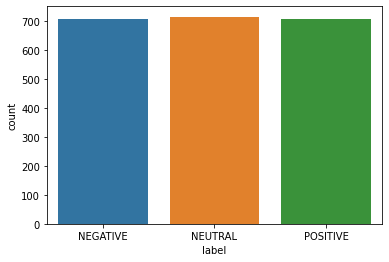

In [30]:
import seaborn as sns
sns.countplot(x='label', data=df)

In [31]:
df.isnull().sum()

# mean_0_a    0
mean_1_a      0
mean_2_a      0
mean_3_a      0
mean_4_a      0
             ..
fft_746_b     0
fft_747_b     0
fft_748_b     0
fft_749_b     0
label         0
Length: 2549, dtype: int64

In [32]:
encode = ({'NEUTRAL': 0, 'POSITIVE': 1, 'NEGATIVE': 2} )
#new dataset with replaced values
df_encoded = df.replace(encode)

print(df_encoded.head())
print(df_encoded['label'].value_counts())

   # mean_0_a  mean_1_a  mean_2_a  mean_3_a  mean_4_a  mean_d_0_a  mean_d_1_a  \
0        4.62      30.3    -356.0      15.6      26.3       1.070       0.411   
1       28.80      33.1      32.0      25.8      22.8       6.550       1.680   
2        8.90      29.4    -416.0      16.7      23.7      79.900       3.360   
3       14.90      31.6    -143.0      19.8      24.3      -0.584      -0.284   
4       28.30      31.3      45.2      27.3      24.5      34.800      -5.790   

   mean_d_2_a  mean_d_3_a  mean_d_4_a  ...  fft_741_b  fft_742_b  fft_743_b  \
0      -15.70        2.06        3.15  ...       23.5       20.3       20.3   
1        2.88        3.83       -4.82  ...      -23.3      -21.8      -21.8   
2       90.20       89.90        2.03  ...      462.0     -233.0     -233.0   
3        8.82        2.30       -1.97  ...      299.0     -243.0     -243.0   
4        3.06       41.40        5.52  ...       12.0       38.1       38.1   

   fft_744_b  fft_745_b  fft_746_b  ff

In [33]:
df_encoded['label'].unique()

array([2, 0, 1])

In [34]:
df_encoded.head()

,# mean_0_a,mean_1_a,mean_2_a,mean_3_a,mean_4_a,mean_d_0_a,mean_d_1_a,mean_d_2_a,mean_d_3_a,mean_d_4_a,...,fft_741_b,fft_742_b,fft_743_b,fft_744_b,fft_745_b,fft_746_b,fft_747_b,fft_748_b,fft_749_b,label
0,4.62,30.3,-356.0,15.6,26.3,1.070,0.411,-15.70,2.06,3.15,...,23.5,20.3,20.3,23.5,-215.0,280.00,-162.00,-162.00,280.00,2
1,28.80,33.1,32.0,25.8,22.8,6.550,1.680,2.88,3.83,-4.82,...,-23.3,-21.8,-21.8,-23.3,182.0,2.57,-31.60,-31.60,2.57,0
2,8.90,29.4,-416.0,16.7,23.7,79.900,3.360,90.20,89.90,2.03,...,462.0,-233.0,-233.0,462.0,-267.0,281.00,-148.00,-148.00,281.00,1
3,14.90,31.6,-143.0,19.8,24.3,-0.584,-0.284,8.82,2.30,-1.97,...,299.0,-243.0,-243.0,299.0,132.0,-12.40,9.53,9.53,-12.40,1
4,28.30,31.3,45.2,27.3,24.5,34.800,-5.790,3.06,41.40,5.52,...,12.0,38.1,38.1,12.0,119.0,-17.60,23.90,23.90,-17.60,0


In [35]:

x=df_encoded.drop(["label"]  ,axis=1)
x.shape

(2132, 2548)

In [36]:
y = df_encoded.loc[:,'label'].values
y.shape

(2132,)

In [37]:

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x)
x = scaler.transform(x)
from keras.utils import to_categorical
y = to_categorical(y)
y.shape

(2132, 3)

In [38]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 4)

In [39]:
x_train = np.reshape(x_train, (x_train.shape[0],1,x.shape[1]))
x_test = np.reshape(x_test, (x_test.shape[0],1,x.shape[1]))
print(x_train.shape)
print(x_test.shape)

(1705, 1, 2548)
(427, 1, 2548)


In [40]:

import tensorflow as tf
from tensorflow.keras import Sequential

from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import LSTM
tf.keras.backend.clear_session()

model = Sequential()
model.add(LSTM(64, input_shape=(1,2548),activation="relu",return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(32,activation="sigmoid"))
model.add(Dropout(0.2))
#model.add(LSTM(100,return_sequences=True))
#model.add(Dropout(0.2))
#model.add(LSTM(50))
#model.add(Dropout(0.2))
model.add(Dense(3, activation='sigmoid'))
from keras.optimizers import SGD
model.compile(loss = 'categorical_crossentropy', optimizer = "adam", metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 1, 64)             668928    
_________________________________________________________________
dropout (Dropout)            (None, 1, 64)             0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 32)                12416     
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense (Dense)                (None, 3)                 99        
Total params: 681,443
Trainable params: 681,443
Non-trainable params: 0
_________________________________________________________________


In [41]:
history = model.fit(x_train, y_train, epochs = 100, validation_data= (x_test, y_test))
score, acc = model.evaluate(x_test, y_test)

Epoch 1/100
54/54 [==============================] - 1s 6ms/step - loss: 0.6753 - accuracy: 0.7583 - val_loss: 0.3074 - val_accuracy: 0.9087
Epoch 2/100
54/54 [==============================] - 0s 2ms/step - loss: 0.2889 - accuracy: 0.9170 - val_loss: 0.2588 - val_accuracy: 0.9133
Epoch 3/100
54/54 [==============================] - 0s 2ms/step - loss: 0.2198 - accuracy: 0.9344 - val_loss: 0.2279 - val_accuracy: 0.9227
Epoch 4/100
54/54 [==============================] - 0s 2ms/step - loss: 0.1808 - accuracy: 0.9441 - val_loss: 0.2227 - val_accuracy: 0.9274
Epoch 5/100
54/54 [==============================] - 0s 2ms/step - loss: 0.1550 - accuracy: 0.9519 - val_loss: 0.1906 - val_accuracy: 0.9297
Epoch 6/100
54/54 [==============================] - 0s 2ms/step - loss: 0.1532 - accuracy: 0.9534 - val_loss: 0.2000 - val_accuracy: 0.9321
Epoch 7/100
54/54 [==============================] - 0s 2ms/step - loss: 0.1032 - accuracy: 0.9678 - val_loss: 0.1600 - val_accuracy: 0.9415
Epoch 8/100
5

In [ ]:
# mean_0_a,mean_1_a,mean_2_a,mean_3_a,mean_4_a,mean_d_0_a,mean_d_1_a,mean_d_2_a,mean_d_3_a,mean_d_4_a,mean_d_0_a2,mean_d_1_a2,mean_d_2_a2,mean_d_3_a2,mean_d_4_a2,mean_d_5_a,mean_d_6_a,mean_d_7_a,mean_d_8_a,mean_d_9_a,mean_d_10_a,mean_d_11_a,mean_d_12_a,mean_d_13_a,mean_d_14_a,mean_d_15_a,mean_d_16_a,mean_d_17_a,mean_d_18_a,mean_d_19_a,mean_d_20_a,mean_d_21_a,mean_d_22_a,mean_d_23_a,mean_d_24_a,mean_d_25_a,mean_d_26_a,mean_d_27_a,mean_d_28_a,mean_d_29_a,mean_d_30_a,mean_d_31_a,mean_d_32_a,mean_d_33_a,mean_d_34_a,mean_d_35_a,mean_d_36_a,mean_d_37_a,mean_d_38_a,mean_d_39_a,mean_d_40_a,mean_d_41_a,mean_d_42_a,mean_d_43_a,mean_d_44_a,mean_d_45_a,mean_d_46_a,mean_d_47_a,mean_d_48_a,mean_d_49_a,stddev_0_a,stddev_1_a,stddev_2_a,stddev_3_a,stddev_4_a,stddev_d_0_a,stddev_d_1_a,stddev_d_2_a,stddev_d_3_a,stddev_d_4_a,moments_0_a,moments_1_a,moments_2_a,moments_3_a,moments_4_a,moments_5_a,moments_6_a,moments_7_a,moments_8_a,moments_9_a,moments_10_a,moments_11_a,moments_12_a,moments_13_a,moments_14_a,moments_15_a,moments_16_a,moments_17_a,moments_18_a,moments_19_a,max_0_a,max_1_a,max_2_a,max_3_a,max_4_a,max_d_0_a,max_d_1_a,max_d_2_a,max_d_3_a,max_d_4_a,max_q_0_a,max_q_1_a,max_q_2_a,max_q_3_a,max_q_4_a,max_q_5_a,max_q_6_a,max_q_7_a,max_q_8_a,max_q_9_a,max_q_10_a,max_q_11_a,max_q_12_a,max_q_13_a,max_q_14_a,max_q_15_a,max_q_16_a,max_q_17_a,max_q_18_a,max_q_19_a,max_q_20_a,max_q_21_a,max_q_22_a,max_q_23_a,max_q_24_a,max_q_25_a,max_q_26_a,max_q_27_a,max_q_28_a,max_q_29_a,max_q_30_a,max_q_31_a,max_q_32_a,max_q_33_a,max_q_34_a,max_q_35_a,max_q_36_a,max_q_37_a,max_q_38_a,max_q_39_a,max_q_40_a,max_q_41_a,max_q_42_a,max_q_43_a,max_q_44_a,max_q_45_a,max_q_46_a,max_q_47_a,max_q_48_a,max_q_49_a,min_0_a,min_1_a,min_2_a,min_3_a,min_4_a,min_d_0_a,min_d_1_a,min_d_2_a,min_d_3_a,min_d_4_a,min_q_0_a,min_q_1_a,min_q_2_a,min_q_3_a,min_q_4_a,min_q_5_a,min_q_6_a,min_q_7_a,min_q_8_a,min_q_9_a,min_q_10_a,min_q_11_a,min_q_12_a,min_q_13_a,min_q_14_a,min_q_15_a,min_q_16_a,min_q_17_a,min_q_18_a,min_q_19_a,min_q_20_a,min_q_21_a,min_q_22_a,min_q_23_a,min_q_24_a,min_q_25_a,min_q_26_a,min_q_27_a,min_q_28_a,min_q_29_a,min_q_30_a,min_q_31_a,min_q_32_a,min_q_33_a,min_q_34_a,min_q_35_a,min_q_36_a,min_q_37_a,min_q_38_a,min_q_39_a,min_q_40_a,min_q_41_a,min_q_42_a,min_q_43_a,min_q_44_a,min_q_45_a,min_q_46_a,min_q_47_a,min_q_48_a,min_q_49_a,covmat_0_a,covmat_1_a,covmat_2_a,covmat_3_a,covmat_4_a,covmat_5_a,covmat_6_a,covmat_7_a,covmat_8_a,covmat_9_a,covmat_10_a,covmat_11_a,covmat_12_a,covmat_13_a,covmat_14_a,covmat_15_a,covmat_16_a,covmat_17_a,covmat_18_a,covmat_19_a,covmat_20_a,covmat_21_a,covmat_22_a,covmat_23_a,covmat_24_a,covmat_25_a,covmat_26_a,covmat_27_a,covmat_28_a,covmat_29_a,covmat_30_a,covmat_31_a,covmat_32_a,covmat_33_a,covmat_34_a,covmat_35_a,covmat_36_a,covmat_37_a,covmat_38_a,covmat_39_a,covmat_40_a,covmat_41_a,covmat_42_a,covmat_43_a,covmat_44_a,covmat_45_a,covmat_46_a,covmat_47_a,covmat_48_a,covmat_49_a,covmat_50_a,covmat_51_a,covmat_52_a,covmat_53_a,covmat_54_a,covmat_55_a,covmat_56_a,covmat_57_a,covmat_58_a,covmat_59_a,covmat_60_a,covmat_61_a,covmat_62_a,covmat_63_a,covmat_64_a,covmat_65_a,covmat_66_a,covmat_67_a,covmat_68_a,covmat_69_a,covmat_70_a,covmat_71_a,covmat_72_a,covmat_73_a,covmat_74_a,covmat_75_a,covmat_76_a,covmat_77_a,covmat_78_a,covmat_79_a,covmat_80_a,covmat_81_a,covmat_82_a,covmat_83_a,covmat_84_a,covmat_85_a,covmat_86_a,covmat_87_a,covmat_88_a,covmat_89_a,covmat_90_a,covmat_91_a,covmat_92_a,covmat_93_a,covmat_94_a,covmat_95_a,covmat_96_a,covmat_97_a,covmat_98_a,covmat_99_a,covmat_100_a,covmat_101_a,covmat_102_a,covmat_103_a,covmat_104_a,covmat_105_a,covmat_106_a,covmat_107_a,covmat_108_a,covmat_109_a,covmat_110_a,covmat_111_a,covmat_112_a,covmat_113_a,covmat_114_a,covmat_115_a,covmat_116_a,covmat_117_a,covmat_118_a,covmat_119_a,covmat_120_a,covmat_121_a,covmat_122_a,covmat_123_a,covmat_124_a,covmat_125_a,covmat_126_a,covmat_127_a,covmat_128_a,covmat_129_a,covmat_130_a,covmat_131_a,covmat_132_a,covmat_133_a,covmat_134_a,covmat_135_a,covmat_136_a,covmat_137_a,covmat_138_a,covmat_139_a,covmat_140_a,covmat_141_a,covmat_142_a,covmat_143_a,eigen_0_a,eigen_1_a,eigen_2_a,eigen_3_a,eigen_4_a,eigen_5_a,eigen_6_a,eigen_7_a,eigen_8_a,eigen_9_a,eigen_10_a,eigen_11_a,logm_0_a,logm_1_a,logm_2_a,logm_3_a,logm_4_a,logm_5_a,logm_6_a,logm_7_a,logm_8_a,logm_9_a,logm_10_a,logm_11_a,logm_12_a,logm_13_a,logm_14_a,logm_15_a,logm_16_a,logm_17_a,logm_18_a,logm_19_a,logm_20_a,logm_21_a,logm_22_a,logm_23_a,logm_24_a,logm_25_a,logm_26_a,logm_27_a,logm_28_a,logm_29_a,logm_30_a,logm_31_a,logm_32_a,logm_33_a,logm_34_a,logm_35_a,logm_36_a,logm_37_a,logm_38_a,logm_39_a,logm_40_a,logm_41_a,logm_42_a,logm_43_a,logm_44_a,logm_45_a,logm_46_a,logm_47_a,logm_48_a,logm_49_a,logm_50_a,logm_51_a,logm_52_a,logm_53_a,logm_54_a,logm_55_a,logm_56_a,logm_57_a,logm_58_a,logm_59_a,logm_60_a,logm_61_a,logm_62_a,logm_63_a,logm_64_a,logm_65_a,logm_66_a,logm_67_a,logm_68_a,logm_69_a,logm_70_a,logm_71_a,logm_72_a,logm_73_a,logm_74_a,logm_75_a,logm_76_a,logm_77_a,entropy0_a,entropy1_a,entropy2_a,entropy3_a,entropy4_a,correlate_0_a,correlate_1_a,correlate_2_a,correlate_3_a,correlate_4_a,correlate_5_a,correlate_6_a,correlate_7_a,correlate_8_a,correlate_9_a,correlate_10_a,correlate_11_a,correlate_12_a,correlate_13_a,correlate_14_a,correlate_15_a,correlate_16_a,correlate_17_a,correlate_18_a,correlate_19_a,correlate_20_a,correlate_21_a,correlate_22_a,correlate_23_a,correlate_24_a,correlate_25_a,correlate_26_a,correlate_27_a,correlate_28_a,correlate_29_a,correlate_30_a,correlate_31_a,correlate_32_a,correlate_33_a,correlate_34_a,correlate_35_a,correlate_36_a,correlate_37_a,correlate_38_a,correlate_39_a,correlate_40_a,correlate_41_a,correlate_42_a,correlate_43_a,correlate_44_a,correlate_45_a,correlate_46_a,correlate_47_a,correlate_48_a,correlate_49_a,correlate_50_a,correlate_51_a,correlate_52_a,correlate_53_a,correlate_54_a,correlate_55_a,correlate_56_a,correlate_57_a,correlate_58_a,correlate_59_a,correlate_60_a,correlate_61_a,correlate_62_a,correlate_63_a,correlate_64_a,correlate_65_a,correlate_66_a,correlate_67_a,correlate_68_a,correlate_69_a,correlate_70_a,correlate_71_a,correlate_72_a,correlate_73_a,correlate_74_a,fft_0_a,fft_1_a,fft_2_a,fft_3_a,fft_4_a,fft_5_a,fft_6_a,fft_7_a,fft_8_a,fft_9_a,fft_10_a,fft_11_a,fft_12_a,fft_13_a,fft_14_a,fft_15_a,fft_16_a,fft_17_a,fft_18_a,fft_19_a,fft_20_a,fft_21_a,fft_22_a,fft_23_a,fft_24_a,fft_25_a,fft_26_a,fft_27_a,fft_28_a,fft_29_a,fft_30_a,fft_31_a,fft_32_a,fft_33_a,fft_34_a,fft_35_a,fft_36_a,fft_37_a,fft_38_a,fft_39_a,fft_40_a,fft_41_a,fft_42_a,fft_43_a,fft_44_a,fft_45_a,fft_46_a,fft_47_a,fft_48_a,fft_49_a,fft_50_a,fft_51_a,fft_52_a,fft_53_a,fft_54_a,fft_55_a,fft_56_a,fft_57_a,fft_58_a,fft_59_a,fft_60_a,fft_61_a,fft_62_a,fft_63_a,fft_64_a,fft_65_a,fft_66_a,fft_67_a,fft_68_a,fft_69_a,fft_70_a,fft_71_a,fft_72_a,fft_73_a,fft_74_a,fft_75_a,fft_76_a,fft_77_a,fft_78_a,fft_79_a,fft_80_a,fft_81_a,fft_82_a,fft_83_a,fft_84_a,fft_85_a,fft_86_a,fft_87_a,fft_88_a,fft_89_a,fft_90_a,fft_91_a,fft_92_a,fft_93_a,fft_94_a,fft_95_a,fft_96_a,fft_97_a,fft_98_a,fft_99_a,fft_100_a,fft_101_a,fft_102_a,fft_103_a,fft_104_a,fft_105_a,fft_106_a,fft_107_a,fft_108_a,fft_109_a,fft_110_a,fft_111_a,fft_112_a,fft_113_a,fft_114_a,fft_115_a,fft_116_a,fft_117_a,fft_118_a,fft_119_a,fft_120_a,fft_121_a,fft_122_a,fft_123_a,fft_124_a,fft_125_a,fft_126_a,fft_127_a,fft_128_a,fft_129_a,fft_130_a,fft_131_a,fft_132_a,fft_133_a,fft_134_a,fft_135_a,fft_136_a,fft_137_a,fft_138_a,fft_139_a,fft_140_a,fft_141_a,fft_142_a,fft_143_a,fft_144_a,fft_145_a,fft_146_a,fft_147_a,fft_148_a,fft_149_a,fft_150_a,fft_151_a,fft_152_a,fft_153_a,fft_154_a,fft_155_a,fft_156_a,fft_157_a,fft_158_a,fft_159_a,fft_160_a,fft_161_a,fft_162_a,fft_163_a,fft_164_a,fft_165_a,fft_166_a,fft_167_a,fft_168_a,fft_169_a,fft_170_a,fft_171_a,fft_172_a,fft_173_a,fft_174_a,fft_175_a,fft_176_a,fft_177_a,fft_178_a,fft_179_a,fft_180_a,fft_181_a,fft_182_a,fft_183_a,fft_184_a,fft_185_a,fft_186_a,fft_187_a,fft_188_a,fft_189_a,fft_190_a,fft_191_a,fft_192_a,fft_193_a,fft_194_a,fft_195_a,fft_196_a,fft_197_a,fft_198_a,fft_199_a,fft_200_a,fft_201_a,fft_202_a,fft_203_a,fft_204_a,fft_205_a,fft_206_a,fft_207_a,fft_208_a,fft_209_a,fft_210_a,fft_211_a,fft_212_a,fft_213_a,fft_214_a,fft_215_a,fft_216_a,fft_217_a,fft_218_a,fft_219_a,fft_220_a,fft_221_a,fft_222_a,fft_223_a,fft_224_a,fft_225_a,fft_226_a,fft_227_a,fft_228_a,fft_229_a,fft_230_a,fft_231_a,fft_232_a,fft_233_a,fft_234_a,fft_235_a,fft_236_a,fft_237_a,fft_238_a,fft_239_a,fft_240_a,fft_241_a,fft_242_a,fft_243_a,fft_244_a,fft_245_a,fft_246_a,fft_247_a,fft_248_a,fft_249_a,fft_250_a,fft_251_a,fft_252_a,fft_253_a,fft_254_a,fft_255_a,fft_256_a,fft_257_a,fft_258_a,fft_259_a,fft_260_a,fft_261_a,fft_262_a,fft_263_a,fft_264_a,fft_265_a,fft_266_a,fft_267_a,fft_268_a,fft_269_a,fft_270_a,fft_271_a,fft_272_a,fft_273_a,fft_274_a,fft_275_a,fft_276_a,fft_277_a,fft_278_a,fft_279_a,fft_280_a,fft_281_a,fft_282_a,fft_283_a,fft_284_a,fft_285_a,fft_286_a,fft_287_a,fft_288_a,fft_289_a,fft_290_a,fft_291_a,fft_292_a,fft_293_a,fft_294_a,fft_295_a,fft_296_a,fft_297_a,fft_298_a,fft_299_a,fft_300_a,fft_301_a,fft_302_a,fft_303_a,fft_304_a,fft_305_a,fft_306_a,fft_307_a,fft_308_a,fft_309_a,fft_310_a,fft_311_a,fft_312_a,fft_313_a,fft_314_a,fft_315_a,fft_316_a,fft_317_a,fft_318_a,fft_319_a,fft_320_a,fft_321_a,fft_322_a,fft_323_a,fft_324_a,fft_325_a,fft_326_a,fft_327_a,fft_328_a,fft_329_a,fft_330_a,fft_331_a,fft_332_a,fft_333_a,fft_334_a,fft_335_a,fft_336_a,fft_337_a,fft_338_a,fft_339_a,fft_340_a,fft_341_a,fft_342_a,fft_343_a,fft_344_a,fft_345_a,fft_346_a,fft_347_a,fft_348_a,fft_349_a,fft_350_a,fft_351_a,fft_352_a,fft_353_a,fft_354_a,fft_355_a,fft_356_a,fft_357_a,fft_358_a,fft_359_a,fft_360_a,fft_361_a,fft_362_a,fft_363_a,fft_364_a,fft_365_a,fft_366_a,fft_367_a,fft_368_a,fft_369_a,fft_370_a,fft_371_a,fft_372_a,fft_373_a,fft_374_a,fft_375_a,fft_376_a,fft_377_a,fft_378_a,fft_379_a,fft_380_a,fft_381_a,fft_382_a,fft_383_a,fft_384_a,fft_385_a,fft_386_a,fft_387_a,fft_388_a,fft_389_a,fft_390_a,fft_391_a,fft_392_a,fft_393_a,fft_394_a,fft_395_a,fft_396_a,fft_397_a,fft_398_a,fft_399_a,fft_400_a,fft_401_a,fft_402_a,fft_403_a,fft_404_a,fft_405_a,fft_406_a,fft_407_a,fft_408_a,fft_409_a,fft_410_a,fft_411_a,fft_412_a,fft_413_a,fft_414_a,fft_415_a,fft_416_a,fft_417_a,fft_418_a,fft_419_a,fft_420_a,fft_421_a,fft_422_a,fft_423_a,fft_424_a,fft_425_a,fft_426_a,fft_427_a,fft_428_a,fft_429_a,fft_430_a,fft_431_a,fft_432_a,fft_433_a,fft_434_a,fft_435_a,fft_436_a,fft_437_a,fft_438_a,fft_439_a,fft_440_a,fft_441_a,fft_442_a,fft_443_a,fft_444_a,fft_445_a,fft_446_a,fft_447_a,fft_448_a,fft_449_a,fft_450_a,fft_451_a,fft_452_a,fft_453_a,fft_454_a,fft_455_a,fft_456_a,fft_457_a,fft_458_a,fft_459_a,fft_460_a,fft_461_a,fft_462_a,fft_463_a,fft_464_a,fft_465_a,fft_466_a,fft_467_a,fft_468_a,fft_469_a,fft_470_a,fft_471_a,fft_472_a,fft_473_a,fft_474_a,fft_475_a,fft_476_a,fft_477_a,fft_478_a,fft_479_a,fft_480_a,fft_481_a,fft_482_a,fft_483_a,fft_484_a,fft_485_a,fft_486_a,fft_487_a,fft_488_a,fft_489_a,fft_490_a,fft_491_a,fft_492_a,fft_493_a,fft_494_a,fft_495_a,fft_496_a,fft_497_a,fft_498_a,fft_499_a,fft_500_a,fft_501_a,fft_502_a,fft_503_a,fft_504_a,fft_505_a,fft_506_a,fft_507_a,fft_508_a,fft_509_a,fft_510_a,fft_511_a,fft_512_a,fft_513_a,fft_514_a,fft_515_a,fft_516_a,fft_517_a,fft_518_a,fft_519_a,fft_520_a,fft_521_a,fft_522_a,fft_523_a,fft_524_a,fft_525_a,fft_526_a,fft_527_a,fft_528_a,fft_529_a,fft_530_a,fft_531_a,fft_532_a,fft_533_a,fft_534_a,fft_535_a,fft_536_a,fft_537_a,fft_538_a,fft_539_a,fft_540_a,fft_541_a,fft_542_a,fft_543_a,fft_544_a,fft_545_a,fft_546_a,fft_547_a,fft_548_a,fft_549_a,fft_550_a,fft_551_a,fft_552_a,fft_553_a,fft_554_a,fft_555_a,fft_556_a,fft_557_a,fft_558_a,fft_559_a,fft_560_a,fft_561_a,fft_562_a,fft_563_a,fft_564_a,fft_565_a,fft_566_a,fft_567_a,fft_568_a,fft_569_a,fft_570_a,fft_571_a,fft_572_a,fft_573_a,fft_574_a,fft_575_a,fft_576_a,fft_577_a,fft_578_a,fft_579_a,fft_580_a,fft_581_a,fft_582_a,fft_583_a,fft_584_a,fft_585_a,fft_586_a,fft_587_a,fft_588_a,fft_589_a,fft_590_a,fft_591_a,fft_592_a,fft_593_a,fft_594_a,fft_595_a,fft_596_a,fft_597_a,fft_598_a,fft_599_a,fft_600_a,fft_601_a,fft_602_a,fft_603_a,fft_604_a,fft_605_a,fft_606_a,fft_607_a,fft_608_a,fft_609_a,fft_610_a,fft_611_a,fft_612_a,fft_613_a,fft_614_a,fft_615_a,fft_616_a,fft_617_a,fft_618_a,fft_619_a,fft_620_a,fft_621_a,fft_622_a,fft_623_a,fft_624_a,fft_625_a,fft_626_a,fft_627_a,fft_628_a,fft_629_a,fft_630_a,fft_631_a,fft_632_a,fft_633_a,fft_634_a,fft_635_a,fft_636_a,fft_637_a,fft_638_a,fft_639_a,fft_640_a,fft_641_a,fft_642_a,fft_643_a,fft_644_a,fft_645_a,fft_646_a,fft_647_a,fft_648_a,fft_649_a,fft_650_a,fft_651_a,fft_652_a,fft_653_a,fft_654_a,fft_655_a,fft_656_a,fft_657_a,fft_658_a,fft_659_a,fft_660_a,fft_661_a,fft_662_a,fft_663_a,fft_664_a,fft_665_a,fft_666_a,fft_667_a,fft_668_a,fft_669_a,fft_670_a,fft_671_a,fft_672_a,fft_673_a,fft_674_a,fft_675_a,fft_676_a,fft_677_a,fft_678_a,fft_679_a,fft_680_a,fft_681_a,fft_682_a,fft_683_a,fft_684_a,fft_685_a,fft_686_a,fft_687_a,fft_688_a,fft_689_a,fft_690_a,fft_691_a,fft_692_a,fft_693_a,fft_694_a,fft_695_a,fft_696_a,fft_697_a,fft_698_a,fft_699_a,fft_700_a,fft_701_a,fft_702_a,fft_703_a,fft_704_a,fft_705_a,fft_706_a,fft_707_a,fft_708_a,fft_709_a,fft_710_a,fft_711_a,fft_712_a,fft_713_a,fft_714_a,fft_715_a,fft_716_a,fft_717_a,fft_718_a,fft_719_a,fft_720_a,fft_721_a,fft_722_a,fft_723_a,fft_724_a,fft_725_a,fft_726_a,fft_727_a,fft_728_a,fft_729_a,fft_730_a,fft_731_a,fft_732_a,fft_733_a,fft_734_a,fft_735_a,fft_736_a,fft_737_a,fft_738_a,fft_739_a,fft_740_a,fft_741_a,fft_742_a,fft_743_a,fft_744_a,fft_745_a,fft_746_a,fft_747_a,fft_748_a,fft_749_a,mean_0_b,mean_1_b,mean_2_b,mean_3_b,mean_4_b,mean_d_0_b,mean_d_1_b,mean_d_2_b,mean_d_3_b,mean_d_4_b,mean_d_0_b2,mean_d_1_b2,mean_d_2_b2,mean_d_3_b2,mean_d_4_b2,mean_d_5_b,mean_d_6_b,mean_d_7_b,mean_d_8_b,mean_d_9_b,mean_d_10_b,mean_d_11_b,mean_d_12_b,mean_d_13_b,mean_d_14_b,mean_d_15_b,mean_d_16_b,mean_d_17_b,mean_d_18_b,mean_d_19_b,mean_d_20_b,mean_d_21_b,mean_d_22_b,mean_d_23_b,mean_d_24_b,mean_d_25_b,mean_d_26_b,mean_d_27_b,mean_d_28_b,mean_d_29_b,mean_d_30_b,mean_d_31_b,mean_d_32_b,mean_d_33_b,mean_d_34_b,mean_d_35_b,mean_d_36_b,mean_d_37_b,mean_d_38_b,mean_d_39_b,mean_d_40_b,mean_d_41_b,mean_d_42_b,mean_d_43_b,mean_d_44_b,mean_d_45_b,mean_d_46_b,mean_d_47_b,mean_d_48_b,mean_d_49_b,stddev_0_b,stddev_1_b,stddev_2_b,stddev_3_b,stddev_4_b,stddev_d_0_b,stddev_d_1_b,stddev_d_2_b,stddev_d_3_b,stddev_d_4_b,moments_0_b,moments_1_b,moments_2_b,moments_3_b,moments_4_b,moments_5_b,moments_6_b,moments_7_b,moments_8_b,moments_9_b,moments_10_b,moments_11_b,moments_12_b,moments_13_b,moments_14_b,moments_15_b,moments_16_b,moments_17_b,moments_18_b,moments_19_b,max_0_b,max_1_b,max_2_b,max_3_b,max_4_b,max_d_0_b,max_d_1_b,max_d_2_b,max_d_3_b,max_d_4_b,max_q_0_b,max_q_1_b,max_q_2_b,max_q_3_b,max_q_4_b,max_q_5_b,max_q_6_b,max_q_7_b,max_q_8_b,max_q_9_b,max_q_10_b,max_q_11_b,max_q_12_b,max_q_13_b,max_q_14_b,max_q_15_b,max_q_16_b,max_q_17_b,max_q_18_b,max_q_19_b,max_q_20_b,max_q_21_b,max_q_22_b,max_q_23_b,max_q_24_b,max_q_25_b,max_q_26_b,max_q_27_b,max_q_28_b,max_q_29_b,max_q_30_b,max_q_31_b,max_q_32_b,max_q_33_b,max_q_34_b,max_q_35_b,max_q_36_b,max_q_37_b,max_q_38_b,max_q_39_b,max_q_40_b,max_q_41_b,max_q_42_b,max_q_43_b,max_q_44_b,max_q_45_b,max_q_46_b,max_q_47_b,max_q_48_b,max_q_49_b,min_0_b,min_1_b,min_2_b,min_3_b,min_4_b,min_d_0_b,min_d_1_b,min_d_2_b,min_d_3_b,min_d_4_b,min_q_0_b,min_q_1_b,min_q_2_b,min_q_3_b,min_q_4_b,min_q_5_b,min_q_6_b,min_q_7_b,min_q_8_b,min_q_9_b,min_q_10_b,min_q_11_b,min_q_12_b,min_q_13_b,min_q_14_b,min_q_15_b,min_q_16_b,min_q_17_b,min_q_18_b,min_q_19_b,min_q_20_b,min_q_21_b,min_q_22_b,min_q_23_b,min_q_24_b,min_q_25_b,min_q_26_b,min_q_27_b,min_q_28_b,min_q_29_b,min_q_30_b,min_q_31_b,min_q_32_b,min_q_33_b,min_q_34_b,min_q_35_b,min_q_36_b,min_q_37_b,min_q_38_b,min_q_39_b,min_q_40_b,min_q_41_b,min_q_42_b,min_q_43_b,min_q_44_b,min_q_45_b,min_q_46_b,min_q_47_b,min_q_48_b,min_q_49_b,covmat_0_b,covmat_1_b,covmat_2_b,covmat_3_b,covmat_4_b,covmat_5_b,covmat_6_b,covmat_7_b,covmat_8_b,covmat_9_b,covmat_10_b,covmat_11_b,covmat_12_b,covmat_13_b,covmat_14_b,covmat_15_b,covmat_16_b,covmat_17_b,covmat_18_b,covmat_19_b,covmat_20_b,covmat_21_b,covmat_22_b,covmat_23_b,covmat_24_b,covmat_25_b,covmat_26_b,covmat_27_b,covmat_28_b,covmat_29_b,covmat_30_b,covmat_31_b,covmat_32_b,covmat_33_b,covmat_34_b,covmat_35_b,covmat_36_b,covmat_37_b,covmat_38_b,covmat_39_b,covmat_40_b,covmat_41_b,covmat_42_b,covmat_43_b,covmat_44_b,covmat_45_b,covmat_46_b,covmat_47_b,covmat_48_b,covmat_49_b,covmat_50_b,covmat_51_b,covmat_52_b,covmat_53_b,covmat_54_b,covmat_55_b,covmat_56_b,covmat_57_b,covmat_58_b,covmat_59_b,covmat_60_b,covmat_61_b,covmat_62_b,covmat_63_b,covmat_64_b,covmat_65_b,covmat_66_b,covmat_67_b,covmat_68_b,covmat_69_b,covmat_70_b,covmat_71_b,covmat_72_b,covmat_73_b,covmat_74_b,covmat_75_b,covmat_76_b,covmat_77_b,covmat_78_b,covmat_79_b,covmat_80_b,covmat_81_b,covmat_82_b,covmat_83_b,covmat_84_b,covmat_85_b,covmat_86_b,covmat_87_b,covmat_88_b,covmat_89_b,covmat_90_b,covmat_91_b,covmat_92_b,covmat_93_b,covmat_94_b,covmat_95_b,covmat_96_b,covmat_97_b,covmat_98_b,covmat_99_b,covmat_100_b,covmat_101_b,covmat_102_b,covmat_103_b,covmat_104_b,covmat_105_b,covmat_106_b,covmat_107_b,covmat_108_b,covmat_109_b,covmat_110_b,covmat_111_b,covmat_112_b,covmat_113_b,covmat_114_b,covmat_115_b,covmat_116_b,covmat_117_b,covmat_118_b,covmat_119_b,covmat_120_b,covmat_121_b,covmat_122_b,covmat_123_b,covmat_124_b,covmat_125_b,covmat_126_b,covmat_127_b,covmat_128_b,covmat_129_b,covmat_130_b,covmat_131_b,covmat_132_b,covmat_133_b,covmat_134_b,covmat_135_b,covmat_136_b,covmat_137_b,covmat_138_b,covmat_139_b,covmat_140_b,covmat_141_b,covmat_142_b,covmat_143_b,eigen_0_b,eigen_1_b,eigen_2_b,eigen_3_b,eigen_4_b,eigen_5_b,eigen_6_b,eigen_7_b,eigen_8_b,eigen_9_b,eigen_10_b,eigen_11_b,logm_0_b,logm_1_b,logm_2_b,logm_3_b,logm_4_b,logm_5_b,logm_6_b,logm_7_b,logm_8_b,logm_9_b,logm_10_b,logm_11_b,logm_12_b,logm_13_b,logm_14_b,logm_15_b,logm_16_b,logm_17_b,logm_18_b,logm_19_b,logm_20_b,logm_21_b,logm_22_b,logm_23_b,logm_24_b,logm_25_b,logm_26_b,logm_27_b,logm_28_b,logm_29_b,logm_30_b,logm_31_b,logm_32_b,logm_33_b,logm_34_b,logm_35_b,logm_36_b,logm_37_b,logm_38_b,logm_39_b,logm_40_b,logm_41_b,logm_42_b,logm_43_b,logm_44_b,logm_45_b,logm_46_b,logm_47_b,logm_48_b,logm_49_b,logm_50_b,logm_51_b,logm_52_b,logm_53_b,logm_54_b,logm_55_b,logm_56_b,logm_57_b,logm_58_b,logm_59_b,logm_60_b,logm_61_b,logm_62_b,logm_63_b,logm_64_b,logm_65_b,logm_66_b,logm_67_b,logm_68_b,logm_69_b,logm_70_b,logm_71_b,logm_72_b,logm_73_b,logm_74_b,logm_75_b,logm_76_b,logm_77_b,entropy0_b,entropy1_b,entropy2_b,entropy3_b,entropy4_b,correlate_0_b,correlate_1_b,correlate_2_b,correlate_3_b,correlate_4_b,correlate_5_b,correlate_6_b,correlate_7_b,correlate_8_b,correlate_9_b,correlate_10_b,correlate_11_b,correlate_12_b,correlate_13_b,correlate_14_b,correlate_15_b,correlate_16_b,correlate_17_b,correlate_18_b,correlate_19_b,correlate_20_b,correlate_21_b,correlate_22_b,correlate_23_b,correlate_24_b,correlate_25_b,correlate_26_b,correlate_27_b,correlate_28_b,correlate_29_b,correlate_30_b,correlate_31_b,correlate_32_b,correlate_33_b,correlate_34_b,correlate_35_b,correlate_36_b,correlate_37_b,correlate_38_b,correlate_39_b,correlate_40_b,correlate_41_b,correlate_42_b,correlate_43_b,correlate_44_b,correlate_45_b,correlate_46_b,correlate_47_b,correlate_48_b,correlate_49_b,correlate_50_b,correlate_51_b,correlate_52_b,correlate_53_b,correlate_54_b,correlate_55_b,correlate_56_b,correlate_57_b,correlate_58_b,correlate_59_b,correlate_60_b,correlate_61_b,correlate_62_b,correlate_63_b,correlate_64_b,correlate_65_b,correlate_66_b,correlate_67_b,correlate_68_b,correlate_69_b,correlate_70_b,correlate_71_b,correlate_72_b,correlate_73_b,correlate_74_b,fft_0_b,fft_1_b,fft_2_b,fft_3_b,fft_4_b,fft_5_b,fft_6_b,fft_7_b,fft_8_b,fft_9_b,fft_10_b,fft_11_b,fft_12_b,fft_13_b,fft_14_b,fft_15_b,fft_16_b,fft_17_b,fft_18_b,fft_19_b,fft_20_b,fft_21_b,fft_22_b,fft_23_b,fft_24_b,fft_25_b,fft_26_b,fft_27_b,fft_28_b,fft_29_b,fft_30_b,fft_31_b,fft_32_b,fft_33_b,fft_34_b,fft_35_b,fft_36_b,fft_37_b,fft_38_b,fft_39_b,fft_40_b,fft_41_b,fft_42_b,fft_43_b,fft_44_b,fft_45_b,fft_46_b,fft_47_b,fft_48_b,fft_49_b,fft_50_b,fft_51_b,fft_52_b,fft_53_b,fft_54_b,fft_55_b,fft_56_b,fft_57_b,fft_58_b,fft_59_b,fft_60_b,fft_61_b,fft_62_b,fft_63_b,fft_64_b,fft_65_b,fft_66_b,fft_67_b,fft_68_b,fft_69_b,fft_70_b,fft_71_b,fft_72_b,fft_73_b,fft_74_b,fft_75_b,fft_76_b,fft_77_b,fft_78_b,fft_79_b,fft_80_b,fft_81_b,fft_82_b,fft_83_b,fft_84_b,fft_85_b,fft_86_b,fft_87_b,fft_88_b,fft_89_b,fft_90_b,fft_91_b,fft_92_b,fft_93_b,fft_94_b,fft_95_b,fft_96_b,fft_97_b,fft_98_b,fft_99_b,fft_100_b,fft_101_b,fft_102_b,fft_103_b,fft_104_b,fft_105_b,fft_106_b,fft_107_b,fft_108_b,fft_109_b,fft_110_b,fft_111_b,fft_112_b,fft_113_b,fft_114_b,fft_115_b,fft_116_b,fft_117_b,fft_118_b,fft_119_b,fft_120_b,fft_121_b,fft_122_b,fft_123_b,fft_124_b,fft_125_b,fft_126_b,fft_127_b,fft_128_b,fft_129_b,fft_130_b,fft_131_b,fft_132_b,fft_133_b,fft_134_b,fft_135_b,fft_136_b,fft_137_b,fft_138_b,fft_139_b,fft_140_b,fft_141_b,fft_142_b,fft_143_b,fft_144_b,fft_145_b,fft_146_b,fft_147_b,fft_148_b,fft_149_b,fft_150_b,fft_151_b,fft_152_b,fft_153_b,fft_154_b,fft_155_b,fft_156_b,fft_157_b,fft_158_b,fft_159_b,fft_160_b,fft_161_b,fft_162_b,fft_163_b,fft_164_b,fft_165_b,fft_166_b,fft_167_b,fft_168_b,fft_169_b,fft_170_b,fft_171_b,fft_172_b,fft_173_b,fft_174_b,fft_175_b,fft_176_b,fft_177_b,fft_178_b,fft_179_b,fft_180_b,fft_181_b,fft_182_b,fft_183_b,fft_184_b,fft_185_b,fft_186_b,fft_187_b,fft_188_b,fft_189_b,fft_190_b,fft_191_b,fft_192_b,fft_193_b,fft_194_b,fft_195_b,fft_196_b,fft_197_b,fft_198_b,fft_199_b,fft_200_b,fft_201_b,fft_202_b,fft_203_b,fft_204_b,fft_205_b,fft_206_b,fft_207_b,fft_208_b,fft_209_b,fft_210_b,fft_211_b,fft_212_b,fft_213_b,fft_214_b,fft_215_b,fft_216_b,fft_217_b,fft_218_b,fft_219_b,fft_220_b,fft_221_b,fft_222_b,fft_223_b,fft_224_b,fft_225_b,fft_226_b,fft_227_b,fft_228_b,fft_229_b,fft_230_b,fft_231_b,fft_232_b,fft_233_b,fft_234_b,fft_235_b,fft_236_b,fft_237_b,fft_238_b,fft_239_b,fft_240_b,fft_241_b,fft_242_b,fft_243_b,fft_244_b,fft_245_b,fft_246_b,fft_247_b,fft_248_b,fft_249_b,fft_250_b,fft_251_b,fft_252_b,fft_253_b,fft_254_b,fft_255_b,fft_256_b,fft_257_b,fft_258_b,fft_259_b,fft_260_b,fft_261_b,fft_262_b,fft_263_b,fft_264_b,fft_265_b,fft_266_b,fft_267_b,fft_268_b,fft_269_b,fft_270_b,fft_271_b,fft_272_b,fft_273_b,fft_274_b,fft_275_b,fft_276_b,fft_277_b,fft_278_b,fft_279_b,fft_280_b,fft_281_b,fft_282_b,fft_283_b,fft_284_b,fft_285_b,fft_286_b,fft_287_b,fft_288_b,fft_289_b,fft_290_b,fft_291_b,fft_292_b,fft_293_b,fft_294_b,fft_295_b,fft_296_b,fft_297_b,fft_298_b,fft_299_b,fft_300_b,fft_301_b,fft_302_b,fft_303_b,fft_304_b,fft_305_b,fft_306_b,fft_307_b,fft_308_b,fft_309_b,fft_310_b,fft_311_b,fft_312_b,fft_313_b,fft_314_b,fft_315_b,fft_316_b,fft_317_b,fft_318_b,fft_319_b,fft_320_b,fft_321_b,fft_322_b,fft_323_b,fft_324_b,fft_325_b,fft_326_b,fft_327_b,fft_328_b,fft_329_b,fft_330_b,fft_331_b,fft_332_b,fft_333_b,fft_334_b,fft_335_b,fft_336_b,fft_337_b,fft_338_b,fft_339_b,fft_340_b,fft_341_b,fft_342_b,fft_343_b,fft_344_b,fft_345_b,fft_346_b,fft_347_b,fft_348_b,fft_349_b,fft_350_b,fft_351_b,fft_352_b,fft_353_b,fft_354_b,fft_355_b,fft_356_b,fft_357_b,fft_358_b,fft_359_b,fft_360_b,fft_361_b,fft_362_b,fft_363_b,fft_364_b,fft_365_b,fft_366_b,fft_367_b,fft_368_b,fft_369_b,fft_370_b,fft_371_b,fft_372_b,fft_373_b,fft_374_b,fft_375_b,fft_376_b,fft_377_b,fft_378_b,fft_379_b,fft_380_b,fft_381_b,fft_382_b,fft_383_b,fft_384_b,fft_385_b,fft_386_b,fft_387_b,fft_388_b,fft_389_b,fft_390_b,fft_391_b,fft_392_b,fft_393_b,fft_394_b,fft_395_b,fft_396_b,fft_397_b,fft_398_b,fft_399_b,fft_400_b,fft_401_b,fft_402_b,fft_403_b,fft_404_b,fft_405_b,fft_406_b,fft_407_b,fft_408_b,fft_409_b,fft_410_b,fft_411_b,fft_412_b,fft_413_b,fft_414_b,fft_415_b,fft_416_b,fft_417_b,fft_418_b,fft_419_b,fft_420_b,fft_421_b,fft_422_b,fft_423_b,fft_424_b,fft_425_b,fft_426_b,fft_427_b,fft_428_b,fft_429_b,fft_430_b,fft_431_b,fft_432_b,fft_433_b,fft_434_b,fft_435_b,fft_436_b,fft_437_b,fft_438_b,fft_439_b,fft_440_b,fft_441_b,fft_442_b,fft_443_b,fft_444_b,fft_445_b,fft_446_b,fft_447_b,fft_448_b,fft_449_b,fft_450_b,fft_451_b,fft_452_b,fft_453_b,fft_454_b,fft_455_b,fft_456_b,fft_457_b,fft_458_b,fft_459_b,fft_460_b,fft_461_b,fft_462_b,fft_463_b,fft_464_b,fft_465_b,fft_466_b,fft_467_b,fft_468_b,fft_469_b,fft_470_b,fft_471_b,fft_472_b,fft_473_b,fft_474_b,fft_475_b,fft_476_b,fft_477_b,fft_478_b,fft_479_b,fft_480_b,fft_481_b,fft_482_b,fft_483_b,fft_484_b,fft_485_b,fft_486_b,fft_487_b,fft_488_b,fft_489_b,fft_490_b,fft_491_b,fft_492_b,fft_493_b,fft_494_b,fft_495_b,fft_496_b,fft_497_b,fft_498_b,fft_499_b,fft_500_b,fft_501_b,fft_502_b,fft_503_b,fft_504_b,fft_505_b,fft_506_b,fft_507_b,fft_508_b,fft_509_b,fft_510_b,fft_511_b,fft_512_b,fft_513_b,fft_514_b,fft_515_b,fft_516_b,fft_517_b,fft_518_b,fft_519_b,fft_520_b,fft_521_b,fft_522_b,fft_523_b,fft_524_b,fft_525_b,fft_526_b,fft_527_b,fft_528_b,fft_529_b,fft_530_b,fft_531_b,fft_532_b,fft_533_b,fft_534_b,fft_535_b,fft_536_b,fft_537_b,fft_538_b,fft_539_b,fft_540_b,fft_541_b,fft_542_b,fft_543_b,fft_544_b,fft_545_b,fft_546_b,fft_547_b,fft_548_b,fft_549_b,fft_550_b,fft_551_b,fft_552_b,fft_553_b,fft_554_b,fft_555_b,fft_556_b,fft_557_b,fft_558_b,fft_559_b,fft_560_b,fft_561_b,fft_562_b,fft_563_b,fft_564_b,fft_565_b,fft_566_b,fft_567_b,fft_568_b,fft_569_b,fft_570_b,fft_571_b,fft_572_b,fft_573_b,fft_574_b,fft_575_b,fft_576_b,fft_577_b,fft_578_b,fft_579_b,fft_580_b,fft_581_b,fft_582_b,fft_583_b,fft_584_b,fft_585_b,fft_586_b,fft_587_b,fft_588_b,fft_589_b,fft_590_b,fft_591_b,fft_592_b,fft_593_b,fft_594_b,fft_595_b,fft_596_b,fft_597_b,fft_598_b,fft_599_b,fft_600_b,fft_601_b,fft_602_b,fft_603_b,fft_604_b,fft_605_b,fft_606_b,fft_607_b,fft_608_b,fft_609_b,fft_610_b,fft_611_b,fft_612_b,fft_613_b,fft_614_b,fft_615_b,fft_616_b,fft_617_b,fft_618_b,fft_619_b,fft_620_b,fft_621_b,fft_622_b,fft_623_b,fft_624_b,fft_625_b,fft_626_b,fft_627_b,fft_628_b,fft_629_b,fft_630_b,fft_631_b,fft_632_b,fft_633_b,fft_634_b,fft_635_b,fft_636_b,fft_637_b,fft_638_b,fft_639_b,fft_640_b,fft_641_b,fft_642_b,fft_643_b,fft_644_b,fft_645_b,fft_646_b,fft_647_b,fft_648_b,fft_649_b,fft_650_b,fft_651_b,fft_652_b,fft_653_b,fft_654_b,fft_655_b,fft_656_b,fft_657_b,fft_658_b,fft_659_b,fft_660_b,fft_661_b,fft_662_b,fft_663_b,fft_664_b,fft_665_b,fft_666_b,fft_667_b,fft_668_b,fft_669_b,fft_670_b,fft_671_b,fft_672_b,fft_673_b,fft_674_b,fft_675_b,fft_676_b,fft_677_b,fft_678_b,fft_679_b,fft_680_b,fft_681_b,fft_682_b,fft_683_b,fft_684_b,fft_685_b,fft_686_b,fft_687_b,fft_688_b,fft_689_b,fft_690_b,fft_691_b,fft_692_b,fft_693_b,fft_694_b,fft_695_b,fft_696_b,fft_697_b,fft_698_b,fft_699_b,fft_700_b,fft_701_b,fft_702_b,fft_703_b,fft_704_b,fft_705_b,fft_706_b,fft_707_b,fft_708_b,fft_709_b,fft_710_b,fft_711_b,fft_712_b,fft_713_b,fft_714_b,fft_715_b,fft_716_b,fft_717_b,fft_718_b,fft_719_b,fft_720_b,fft_721_b,fft_722_b,fft_723_b,fft_724_b,fft_725_b,fft_726_b,fft_727_b,fft_728_b,fft_729_b,fft_730_b,fft_731_b,fft_732_b,fft_733_b,fft_734_b,fft_735_b,fft_736_b,fft_737_b,fft_738_b,fft_739_b,fft_740_b,fft_741_b,fft_742_b,fft_743_b,fft_744_b,fft_745_b,fft_746_b,fft_747_b,fft_748_b,fft_749_b,label
